In [0]:
#Important Libraries and Packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
import scipy.io
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import sklearn.model_selection
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import StratifiedKFold




[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Average Accuracy is :0.695000
The maximum accuracies are
[0.5   0.7   0.7   0.7   0.875]


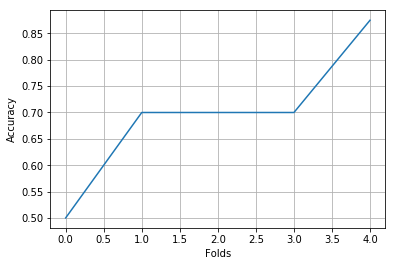

In [0]:
# model code to get output via voting from top 3 good performing channels for beta channel(Channel 30 ,31 & 34)
accuracy=[]
models=[]
nfold = 5
Rsq = np.zeros(nfold)
channel_list = np.array([30,31,34])
#load the files
filename="Ch_30.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
y=mat['y']
y=np.ravel(y)
Xs_ch_1=X[:,35:] 
#channel 31
filename="Ch_31.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_2=X[:,35:]
#channel 34
filename="Ch_34.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_3=X[:,35:]

skf = StratifiedKFold(n_splits=nfold,shuffle=True,random_state =23)
i=0
for is_split, Indices in enumerate(skf.split(Xs_ch_1,y)):
    
  Itr, Its = Indices
  Xtr_channel_1=Xs_ch_1[Itr,:]
  Xts_channel_1=Xs_ch_1[Its,:]
  ytr_channel_1=y[Itr]
  yts_channel_1=y[Its]
  # channel 31 
  
  Xtr_channel_2=Xs_ch_2[Itr,:]
  Xts_channel_2=Xs_ch_2[Its,:]
  ytr_channel_2=y[Itr]
  yts_channel_2=y[Its]
  
  #channel 34
  Xtr_channel_3=Xs_ch_3[Itr,:]
  Xts_channel_3=Xs_ch_3[Its,:]
  ytr_channel_3=y[Itr]
  yts_channel_3=y[Its]
  
  
  
  svc_ch_1 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_1.fit(Xtr_channel_1,ytr_channel_1)
  yhat_ch_1=svc_ch_1.predict(Xts_channel_1)
  
  svc_ch_2 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_2.fit(Xtr_channel_2,ytr_channel_2)
  yhat_ch_2=svc_ch_2.predict(Xts_channel_2)
  
  svc_ch_3 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_3.fit(Xtr_channel_3,ytr_channel_3)
  yhat_ch_3=svc_ch_3.predict(Xts_channel_3)
  
  yhat_fold = (yhat_ch_1 + yhat_ch_2 + yhat_ch_3 )/3
  yhat_round = np.rint(yhat_fold)
  # taking yts 30 since the output results are same for all 3 channels check the indices.
  acc = np.mean(yhat_round==yts_channel_1)
  Rsq[i]=acc
  i = i + 1

Rsq_mean=np.mean(Rsq)
print("Average Accuracy is :{0:f}".format(Rsq_mean))
print('The maximum accuracies are')
print(np.sort(Rsq))
Rsq_std=np.std(Rsq)/np.sqrt(nfold-1)
plt.plot(np.arange(5),Rsq)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.625
The maximum accuracies are
[0.5   0.6   0.6   0.625 0.8  ]


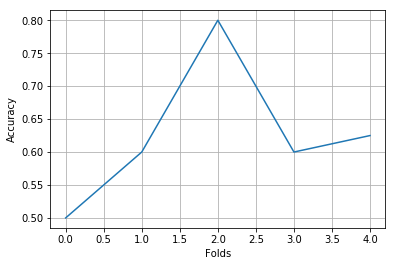

In [0]:
# model code to get output via voting from top 3 good performing channels for gamma channel(Channel 39,23,8)
accuracy=[]
models=[]
nfold = 5
Rsq = np.zeros(nfold)


filename="Ch_39.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
y=mat['y']
y=np.ravel(y)
Xs_ch_1=X[:,35:] 
#channel 31
filename="Ch_23.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_2=X[:,35:]
#channel 34
filename="Ch_8.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_3=X[:,35:]
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)
skf = StratifiedKFold(n_splits=nfold,shuffle=True,random_state =39)
i=0
for is_split, Indices in enumerate(skf.split(Xs_ch_1,y)):
    
  Itr, Its = Indices
  Xtr_channel_1=Xs_ch_1[Itr,:]
  Xts_channel_1=Xs_ch_1[Its,:]
  ytr_channel_1=y[Itr]
  yts_channel_1=y[Its]
 
  Xtr_channel_2=Xs_ch_2[Itr,:]
  Xts_channel_2=Xs_ch_2[Its,:]
  ytr_channel_2=y[Itr]
  yts_channel_2=y[Its]
  
  Xtr_channel_3=Xs_ch_3[Itr,:]
  Xts_channel_3=Xs_ch_3[Its,:]
  ytr_channel_3=y[Itr]
  yts_channel_3=y[Its]
  
  #load the 3 models for 3 different channels
  svc_ch_1 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_1.fit(Xtr_channel_1,ytr_channel_1)
  yhat_ch_1=svc_ch_1.predict(Xts_channel_1)
  
  svc_ch_2 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_2.fit(Xtr_channel_2,ytr_channel_2)
  yhat_ch_2=svc_ch_2.predict(Xts_channel_2)
  
  svc_ch_3 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_3.fit(Xtr_channel_3,ytr_channel_3)
  yhat_ch_3=svc_ch_3.predict(Xts_channel_3)
  
  yhat_fold = (yhat_ch_1 + yhat_ch_2 + yhat_ch_3 )/3
  yhat_round = np.rint(yhat_fold)
  # taking yts for the first channel since the output results are same for all 3 channels check the indices.
  acc = np.mean(yhat_round==yts_channel_1)
  Rsq[i]=acc
  i = i + 1

Rsq_mean=np.mean(Rsq)

print(Rsq_mean)
print('The maximum accuracies are')
print(np.sort(Rsq))

plt.plot(np.arange(5),Rsq)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.68
The maximum accuracies are
[0.5 0.6 0.7 0.8 0.8]


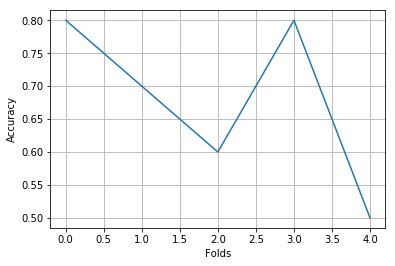

In [0]:
# model code to get output via voting from top 5 good performing channels combining beta and gamma bands.
accuracy=[]
models=[]
nfold = 5
Rsq = np.zeros(nfold)

# to get the indices in the split function of kfolduse channel 30

# channel 34 beta
filename="Ch_34.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
y=mat['y']
y=np.ravel(y)
Xs_ch_1=X[:,35:] 
#channel 30 beta
filename="Ch_30.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_2=X[:,35:]
#channel 31 beta
filename="Ch_31.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_3=X[:,35:]

#channel 8 gamma
filename="Ch_8.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_4=X[:,35:]

#channel 23 gamma

filename="Ch_23.mat"
mat = scipy.io.loadmat(filename)
X=mat['PSD1']
Xs_ch_5=X[:,35:]

skf = StratifiedKFold(n_splits=nfold,shuffle=True,random_state =41)
i=0
for is_split, Indices in enumerate(skf.split(Xs_ch_1,y)):
    
  Itr, Its = Indices
  Xtr_channel_1=Xs_ch_1[Itr,:]
  Xts_channel_1=Xs_ch_1[Its,:]
  ytr_channel_1=y[Itr]
  yts_channel_1=y[Its]

  
  Xtr_channel_2=Xs_ch_2[Itr,:]
  Xts_channel_2=Xs_ch_2[Its,:]
  ytr_channel_2=y[Itr]
  yts_channel_2=y[Its]
  

  Xtr_channel_3=Xs_ch_3[Itr,:]
  Xts_channel_3=Xs_ch_3[Its,:]
  ytr_channel_3=y[Itr]
  yts_channel_3=y[Its]
  
  Xtr_channel_4=Xs_ch_4[Itr,:]
  Xts_channel_4=Xs_ch_4[Its,:]
  ytr_channel_4=y[Itr]
  yts_channel_4=y[Its]
  
  Xtr_channel_5=Xs_ch_5[Itr,:]
  Xts_channel_5=Xs_ch_5[Its,:]
  ytr_channel_5=y[Itr]
  yts_channel_5=y[Its]
  
  
  
  svc_ch_1 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_1.fit(Xtr_channel_1,ytr_channel_1)
  yhat_ch_1=svc_ch_1.predict(Xts_channel_1)
  
  svc_ch_2 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_2.fit(Xtr_channel_2,ytr_channel_2)
  yhat_ch_2=svc_ch_2.predict(Xts_channel_2)
  
  svc_ch_3 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_3.fit(Xtr_channel_3,ytr_channel_3)
  yhat_ch_3=svc_ch_3.predict(Xts_channel_3)
  
  svc_ch_4 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_4.fit(Xtr_channel_4,ytr_channel_4)
  yhat_ch_4=svc_ch_4.predict(Xts_channel_4)
  
  svc_ch_5 = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=0.0073, verbose=10)
  svc_ch_5.fit(Xtr_channel_5,ytr_channel_5)
  yhat_ch_5=svc_ch_5.predict(Xts_channel_5)
  
  #implement voting
  
  yhat_fold = (yhat_ch_1 + yhat_ch_2 + yhat_ch_3 + yhat_ch_4 + yhat_ch_5 )/5
  yhat_round = np.rint(yhat_fold)
 
  acc = np.mean(yhat_round==yts_channel_1)
  Rsq[i]=acc
  i = i + 1

Rsq_mean=np.mean(Rsq)

print(Rsq_mean)
print('The maximum accuracies are')
print(np.sort(Rsq))


# plot the figure
plt.plot(np.arange(5),Rsq)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()